In [1]:
import pandas as pd
import numpy as np

from rrmpg.models import GR4J

In [27]:
import os

In [3]:
data_location = os.path.join('/data')
y_h = 1997  # End year
y_l = 1990  # Start year

In [4]:
# Load the data
maulescreek_rain_et = pd.read_csv(
    os.path.join(
        data_location,
        'SILO(-30.5,150.1)',
        'FAO56_Penman_Monteith_1989.csv'
    )
)
maulescreek_streamflow = pd.read_csv(
    os.path.join(
        data_location,
        'water_level',
        'bom_gauge_daily_mean_419051.csv'
    )
)

# fix dates 
maulescreek_rain_et['Date'] = pd.to_datetime(maulescreek_rain_et['Date2'],format="%d-%m-%Y")
maulescreek_streamflow['Date'] = pd.to_datetime(maulescreek_streamflow['Timestamp'],utc=True, format='%Y-%m-%d')
maulescreek_streamflow['Date'] = maulescreek_streamflow['Date'].dt.date
maulescreek_streamflow['Date'] = pd.to_datetime(maulescreek_streamflow['Date'])

# Slicing the data for relevant time periods
rain = maulescreek_rain_et[((maulescreek_rain_et['Date']).dt.year >y_l) & ((maulescreek_rain_et['Date']).dt.year <y_h)]['Rain'].values
et = maulescreek_rain_et[((maulescreek_rain_et['Date']).dt.year >y_l) & ((maulescreek_rain_et['Date']).dt.year <y_h)]['FAO56'].values
streamflow = maulescreek_streamflow[((maulescreek_streamflow['Date']).dt.year >y_l) & ((maulescreek_streamflow['Date']).dt.year <y_h)]['Value'].values
dates = maulescreek_rain_et[((maulescreek_rain_et['Date']).dt.year >y_l) & ((maulescreek_rain_et['Date']).dt.year <y_h)]['Date']
dates = dates.reset_index()

In [6]:
model = GR4J()
model.get_params()

{'x1': 945.7253286548652,
 'x2': -2.8098829411084223,
 'x3': 299.2074529300801,
 'x4': 2.544049524726632}

In [8]:
maulescreek_rain_et_2010_2015 = maulescreek_rain_et[(maulescreek_rain_et['Date'] >= '2010-01-01') & (maulescreek_rain_et['Date'] < '2016-01-01')]

maulescreek_streamflow_2010_2015 = maulescreek_streamflow[(maulescreek_streamflow['Date'] >= '2009-12-31') & (maulescreek_streamflow['Date'] < '2015-12-31')]

In [16]:
flow1 = maulescreek_streamflow_2010_2015['Value'].values
prcp1 = maulescreek_rain_et_2010_2015['Rain'].values
et1 = maulescreek_rain_et_2010_2015['FAO56'].values

In [25]:
result = model.fit(flow1, prcp1, et1)

In [26]:
params = {}

param_names = model.get_parameter_names()

for i, param in enumerate(param_names):
    params[param] = result.x[i]

# This line set the model parameters to the ones specified in the dict
model.set_params(params)

# To be sure, let's look at the current model parameters
model.get_params()

{'x1': 100.0, 'x2': 2.4695478295877824, 'x3': 20.0, 'x4': 1.1}

In [32]:
flow_pred = model.simulate(prcp1, et1)

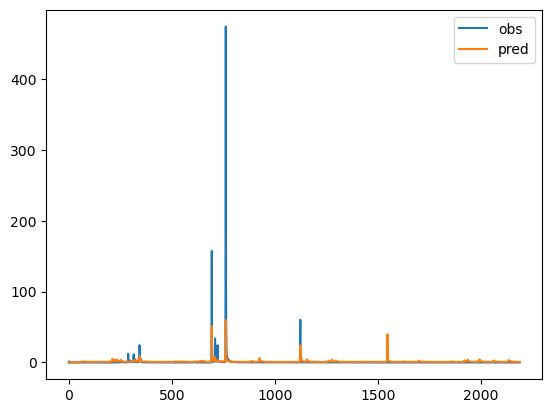

In [34]:
import matplotlib.pyplot as plt
plt.plot(flow1, label='obs')
plt.plot(flow_pred, label='pred')
plt.legend()